In [2]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray} \Large
Z_{n+1} = (-Z_{n})^{ (-e^{Z_{n}^{x}})^{(e^{Z_{n}^{x}})^\
{(-e^{Z_{n}^{x}})^{(e^{Z_{n}^{x}})^{(-e^{Z_{n}^{x}})^\
{(e^{Z_{n}^{x}})^{(-e^{Z_{n}^{x}})^{(e^{Z_{n}^{x}})} }} } } } } }
\end{eqnarray}""")

<IPython.core.display.Latex object>

# Dread Skull (er whatever)
    
    Z = (-Z)^(-exp(Z^x)^(exp(Z^x)^(-exp(Z^x)^(exp(Z^x)^(-exp(Z^x)^(exp(Z^x)^(-exp(Z^x))))))))
    
    Example parameter:
    x = -0.295887110004

In [3]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

In [4]:
def dreadSkull(Z, p, Z0=None, ET=None):
    """ Z = bugga_bear(Z, p) 
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
        p[0]
    
    MATLAB:
    Z = (-Z)^(-exp(Z^x)^(exp(Z^x)^(-exp(Z^x)^(exp(Z^x)^(-exp(Z^x)^(exp(Z^x)^(-exp(Z^x))))))))
    """
    ZEP = np.exp(Z**p)
    Zout = (-Z)**(-ZEP**(ZEP**(-ZEP**(ZEP**(-ZEP**(ZEP**(-ZEP)))))))
    return Zout

In [5]:
#                                        -- define parameters p iterate the above equation
par_set = {'n_rows': 800, 'n_cols': 800}
par_set['center_point'] = 0.75 + 0.0*1j
par_set['theta'] = -np.pi / 2
par_set['zoom'] = 0.4

par_set['it_max'] = 64
par_set['max_d'] = 4 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

p = -0.295887110004

list_tuple = [(dreadSkull, (p))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
print(time.time() - t0, '\t total time')

#                  escape time graphical norm
t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

24.705617904663086 	 total time
converstion time =	 1.3651161193847656


coloring time:	 7.904145956039429


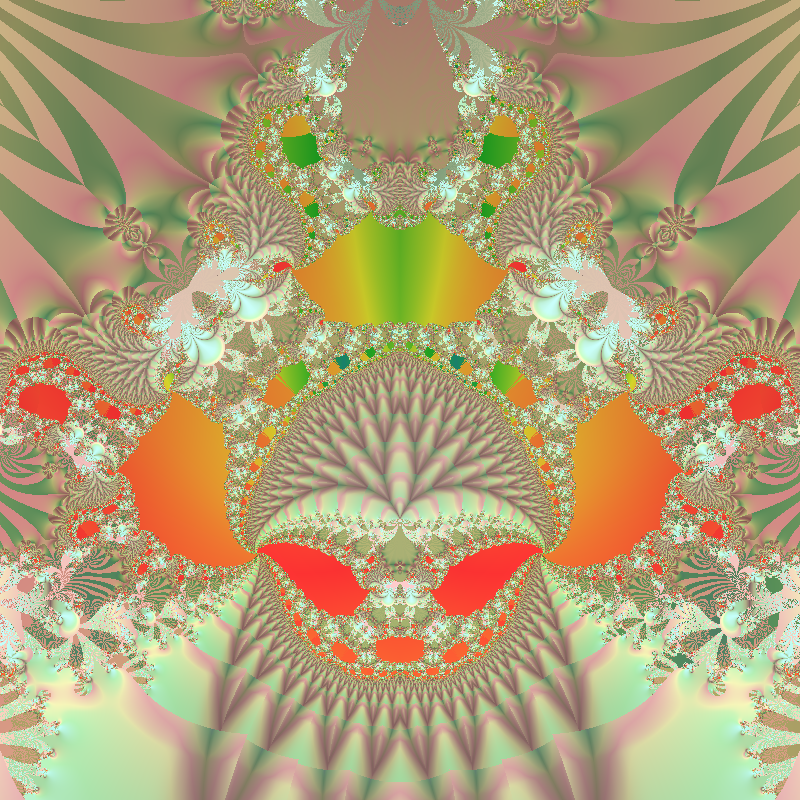

In [6]:
H = ncp.range_norm(Zr - Zd, lo=0.0, hi=0.5)
S = ncp.range_norm(ETn, lo=0.2, hi=0.8)
V = ncp.range_norm(1 - Zr, lo=0.5, hi=1.0)
t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

In [11]:
#                                        smaller -> view individual escape time sets -- "iconic" 
par_set = {'n_rows': 200, 'n_cols': 200}
par_set['center_point'] = 0.75 + 0.0*1j
par_set['theta'] = -np.pi / 2
par_set['zoom'] = 0.4

par_set['it_max'] = 64
par_set['max_d'] = 4 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

p = -0.295887110004
list_tuple = [(dreadSkull, (p))]

t0 = time.time()
ET_sm, Z_sm, Z0_sm = ig.get_primitives(list_tuple, par_set)
print(time.time() - t0, '\t total time')

#                  escape time graphical norm
t0 = time.time()
Zd_sm, Zr_sm, ETn_sm = ncp.etg_norm(Z0_sm, Z_sm, ET_sm)
print('converstion time =\t', time.time() - t0)

1.7076849937438965 	 total time
converstion time =	 0.09462904930114746


coloring time =	 0.2239820957183838


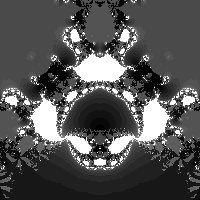

In [12]:
#                  Escape Time: darker escaped sooner
t0 = time.time()
ETd = ncp.mat_to_gray(ETn_sm)
print('coloring time =\t',time.time() - t0)
display(ETd)

coloring time =	 0.2218787670135498


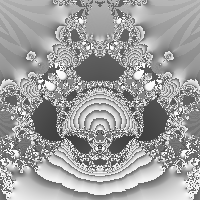

In [13]:
#                  Distance at Escape Time: lighter traveled further
t0 = time.time()
D = ncp.mat_to_gray(Zd_sm, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(D)

coloring time =	 0.2220020294189453


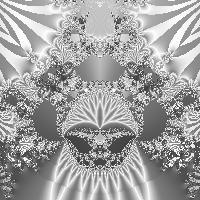

In [16]:
#                  Rotation at Escape Time: lighter rotated more
t0 = time.time()
R = ncp.mat_to_gray(Zr_sm, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(R)

In [17]:
64/255

0.25098039215686274

coloring time:	 0.4626920223236084


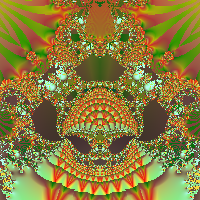

In [23]:
H = ncp.range_norm(Zr_sm - Zd_sm, lo=0.0, hi=0.5)
S = ncp.range_norm(Zr_sm, lo=0.25, hi=1.0)
V = ncp.range_norm(Zd_sm, lo=0.25, hi=1.0)
t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

coloring time:	 0.8836290836334229


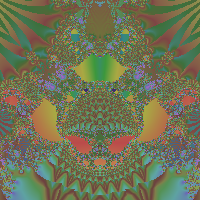

In [134]:
H = ncp.range_norm(Zr_sm - Zd_sm, lo=0.0, hi=0.8)
S = ncp.range_norm(ETn_sm, lo=0.4, hi=0.6)
V = ncp.range_norm(ETn_sm + (Zd_sm - Zr_sm), lo=0.4, hi=1.0)
t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

ET =	 2


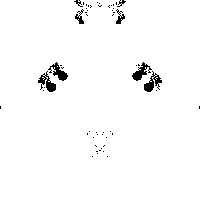

ET =	 3


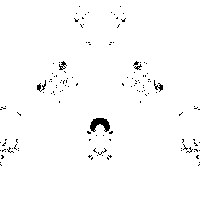

ET =	 4


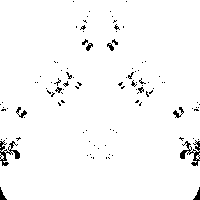

ET =	 5


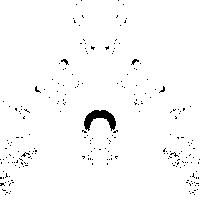

ET =	 6


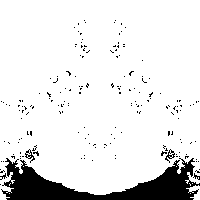

ET =	 7


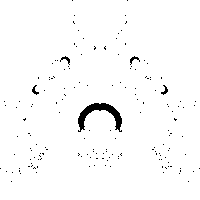

ET >	 8


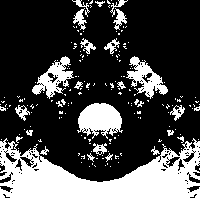

In [128]:
#                                        view smaller - individual escape time starting points
lo_ET = 2
hi_ET = lo_ET + 6
for t in range(lo_ET, hi_ET):
    print('ET =\t',t)
    I = np.ones(ET_sm.shape)
    I[ET_sm == t] = 0
    display(ncp.mat_to_gray(I))
I = np.ones(ET_sm.shape)
I[ET_sm > hi_ET] = 0
print('ET >\t',hi_ET)
display(ncp.mat_to_gray(I))

In [28]:
#                                        view smaller - individual escape time frequency
for k in range(0,int(ET_sm.max())):
    print(k, (ET_sm == k).sum())
print('\nHow many never escaped:\n>',(ET_sm > k).sum())

0 0
1 1000
2 1540
3 869
4 577
5 1419
6 4383
7 670
8 2294
9 370
10 816
11 325
12 358
13 325
14 215
15 323
16 129
17 344
18 80
19 2466
20 108
21 10093
22 135
23 3545
24 112
25 3116
26 93
27 1045
28 63
29 355
30 59
31 200
32 33
33 102
34 43
35 74
36 22
37 58
38 30
39 38
40 9
41 34
42 14
43 11
44 10
45 7
46 0
47 12
48 4
49 4
50 6
51 2
52 0
53 2
54 0
55 4
56 0
57 6
58 2
59 0
60 0
61 0
62 0
63 2
64 0

How many never escaped:
> 2044


In [29]:
#                           get the list of unescaped starting points and look for orbit points
Z_overs = Z0[ET_sm == ET_sm.max()]

v1 = Z_overs[0]
d = '%0.2f'%(np.abs(v1))
theta = '%0.1f'%(180*np.arctan2(np.imag(v1), np.real(v1))/np.pi)
print('Unescaped Vector:\n\tV = ', d, theta, 'degrees\n')

print('%9d'%Z_overs.size, 'total unescaped points\n')
print('%9s'%('points'), 'near V', '      (plane units)')
for denom0 in range(1,12):
    neighbor_distance = np.abs(v1) * 1/denom0
    v1_list = Z_overs[np.abs(Z_overs-v1) < neighbor_distance]
    print('%9d'%len(v1_list), 'within V/%2d  (%0.3f)'%(denom0, neighbor_distance))

Unescaped Vector:
	V =  4.95 26.3 degrees

     2044 total unescaped points

   points near V       (plane units)
     1255 within V/ 1  (4.950)
       32 within V/ 2  (2.475)
       12 within V/ 3  (1.650)
        7 within V/ 4  (1.238)
        4 within V/ 5  (0.990)
        3 within V/ 6  (0.825)
        3 within V/ 7  (0.707)
        3 within V/ 8  (0.619)
        3 within V/ 9  (0.550)
        3 within V/10  (0.495)
        2 within V/11  (0.450)
